In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
#*******load module***********


I extracted all records from 7 job posting data files that provided in blog. Among them I extracted positions that posted by Amazon and Google to do further analysis.

In [7]:

rawAmazon=pd.read_csv('E:/JOB_seeker/jobcome/2020/Dataincubator/proposal/dataset/temp_datalab_records_job_listings/Amazon.csv')
rawGoogle=pd.read_csv('E:/JOB_seeker/jobcome/2020/Dataincubator/proposal/dataset/temp_datalab_records_job_listings/Google.csv')
makeAmazon=rawAmazon.copy()
makeGoogle=rawGoogle.copy()
makeAmazon=makeAmazon.loc[~(makeAmazon['isin']=='isin'),:]
makeGoogle=makeGoogle.loc[~(makeGoogle['isin']=='isin'),:]
#*******load data***********
makeAmazon=makeAmazon.astype(str)
makeGoogle=makeGoogle.astype(str)
#**************data type*************
#makeAmazon.columns
#titlesA=makeAmazon['title'].value_counts().reset_index()
#titlesG=makeGoogle['title'].value_counts().reset_index()
#np.sum(makeGoogle['date_DA']!=makeGoogle['as_of_date'])
#*******statistics***********


In [8]:
#============data clean procedure
singleA=makeAmazon.nunique()
singleG=makeGoogle.nunique()
singleA=singleA.loc[singleA==1].index.tolist()
singleG=singleG.loc[singleG==1].index.tolist()
singlelist=singleA
makeAmazon.drop(singlelist,axis=1,inplace=True)
makeGoogle.drop(singlelist,axis=1,inplace=True)
makeAmazon.drop('location_string',axis=1,inplace=True)
makeGoogle.drop('location_string',axis=1,inplace=True)
#*******drop***********
makeAmazon['date_DA']=makeAmazon['date_added'].apply(lambda x: x.split(' ')[0])
makeAmazon['time_DA']=makeAmazon['date_added'].apply(lambda x: x.split(' ')[1])
makeAmazon.drop('date_added',axis=1,inplace=True)
makeAmazon['date_DU']=makeAmazon['date_updated'].apply(lambda x: x.split(' ')[0])
makeAmazon['time_DU']=makeAmazon['date_updated'].apply(lambda x: x.split(' ')[1])
makeAmazon.drop('date_updated',axis=1,inplace=True)
makeGoogle['date_DA']=makeGoogle['date_added'].apply(lambda x: x.split(' ')[0])
makeGoogle['time_DA']=makeGoogle['date_added'].apply(lambda x: x.split(' ')[1])
makeGoogle.drop('date_added',axis=1,inplace=True)
makeGoogle['date_DU']=makeGoogle['date_updated'].apply(lambda x: x.split(' ')[0])
makeGoogle['time_DU']=makeGoogle['date_updated'].apply(lambda x: x.split(' ')[1])
makeGoogle.drop('date_updated',axis=1,inplace=True)
makeAmazon['year_PD']=makeAmazon['posted_date'].apply(lambda x: int(x.split('-')[0]))
makeAmazon['month_PD']=makeAmazon['posted_date'].apply(lambda x: int(x.split('-')[1]))
makeAmazon['day_PD']=makeAmazon['posted_date'].apply(lambda x: int(x.split('-')[2]))
#*******split***********:date_added/DA,date_updated/DU,posted_date/PD


I found that in Amazon data there is purpose specification in job title such as some jobs are recurited for Alexa development. So I will start with Alexa. And I performed tokenization on job titles using one-gram and two-gram.

In [9]:
#=================Amazon_Alexa_title_tokenize
Alexa=makeAmazon.loc[makeAmazon['title'].str.contains('Alexa'),:].reset_index(drop=True)
vectorizer = CountVectorizer(ngram_range=(1, 2))
titleToken = vectorizer.fit_transform(Alexa['title'])
tokenname=['title_'+v for v in vectorizer.get_feature_names()]
titleToken=pd.DataFrame(titleToken.toarray(),columns = tokenname)
titleToken=titleToken.merge(Alexa['year_PD'],left_index =True,right_index =True,how='left')
titleToken['year_PD'].unique()
titlerank2016=titleToken.loc[titleToken['year_PD']==2016,:].iloc[:,:-1].sum().sort_values(ascending=False)
titlerank2017=titleToken.loc[titleToken['year_PD']==2017,:].iloc[:,:-1].sum().sort_values(ascending=False)
titlerank2018=titleToken.loc[titleToken['year_PD']==2018,:].iloc[:,:-1].sum().sort_values(ascending=False)
takeoutlist=['alexa','amazon']
titlerank2016=titlerank2016.loc[[False if any(x in t for x in takeoutlist) else True for t in titlerank2016.index]]
titlerank2017=titlerank2017.loc[[False if any(x in t for x in takeoutlist) else True for t in titlerank2017.index]]
titlerank2018=titlerank2018.loc[[False if any(x in t for x in takeoutlist) else True for t in titlerank2018.index]]

titlerank2016=titlerank2016.loc[titlerank2016!=0]
titlerank2017=titlerank2017.loc[titlerank2017!=0]
titlerank2018=titlerank2018.loc[titlerank2018!=0]


TOkens and their appear frequency are grouped by years. And some obvious redundant token are deleted such as 'amazon' and 'alexa'. Next we will explore newly shown token for each year to see if any informations can be dicovered.

In [16]:
#=====================token differences
in2017notin2016=[True if t not in titlerank2016.index else False for t in titlerank2017.index]
in2017notin2016=titlerank2017.loc[in2017notin2016]
in2018notin2017=[True if t not in titlerank2017.index else False for t in titlerank2018.index]
in2018notin2017=titlerank2018.loc[in2018notin2017]
in2018notin2016=[True if t not in titlerank2016.index else False for t in titlerank2018.index]
in2018notin2016=titlerank2018.loc[in2018notin2016]
location='kendall square cambridge'
boolin2018notin2017=[False if i.split('_')[1] in location else True for i in in2018notin2017.index.tolist()]
in2018notin2017=in2018notin2017.loc[boolin2018notin2017]
in2017notin2016_dict={i.split('_')[1]:j for i,j in in2017notin2016.iteritems()}
in2018notin2017_dict={i.split('_')[1]:j for i,j in in2018notin2017.iteritems()}
in2018notin2016_dict={i.split('_')[1]:j for i,j in in2018notin2016.iteritems()}
 


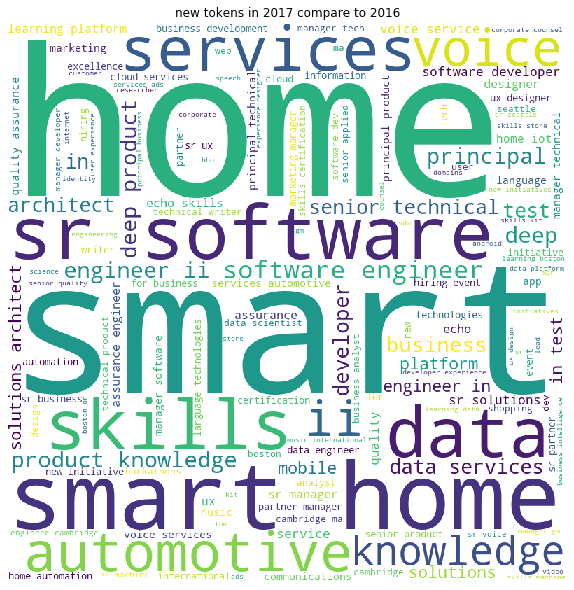

In [13]:
# plot the WordCloud image 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(in2017notin2016_dict) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('new tokens in 2017 compare to 2016')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 



From the plot, we can see that 'smart home' clearly occupys the main spot. Other intersting points includes 'voice', 'mobile', 'automotive', 'deep', 'services'. I will elabrate them in my proposal.

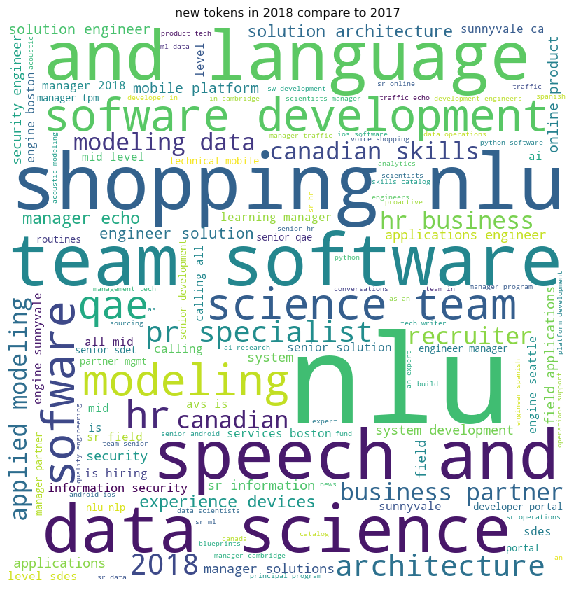

In [17]:

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(in2018notin2017_dict) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title('new tokens in 2018 compare to 2017')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

From the plot, we can see that 'nlu','speech','data science', 'shopping','modeling','language' have a fair share of spots on this map. I will elabrate them in my proposal.